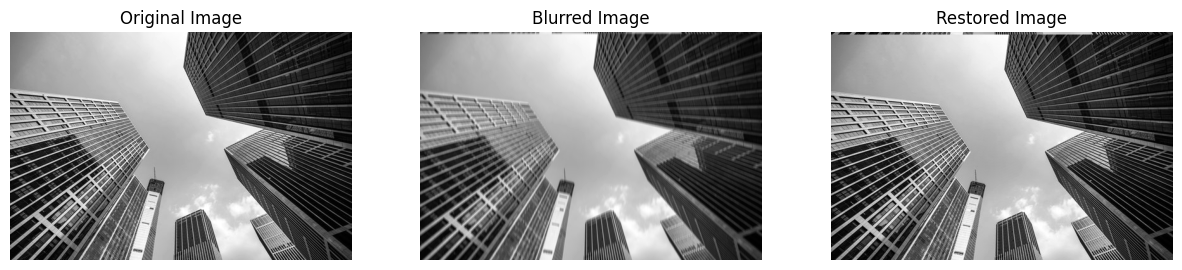

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread(r'F:\CV\EX6\360_F_281897358_3rj9ZBSZHo5s0L1ug7uuIHadSxh9Cc75.jpg', cv2.IMREAD_GRAYSCALE)

# Set the sigma value
sigma = 4

# Automatically generate the Gaussian kernel using OpenCV
gaussian_kernel = cv2.getGaussianKernel(ksize = 5, sigma=sigma)
# gaussian_kernel = gaussian_kernel * gaussian_kernel.T

def apply_filter(img, kernel):
    kernel_ft = np.fft.fft2(kernel, s=img.shape)
    img_ft = np.fft.fft2(img)
    inverse_filter_ft = kernel_ft 
    restored_img_ft = img_ft * inverse_filter_ft
    restored_img = np.fft.ifft2(restored_img_ft).real
    return np.clip(restored_img, 0, 255)

def inverse_filter(blurred_img, kernel):
    kernel_ft = np.fft.fft2(kernel, s=blurred_img.shape)
    blurred_img_ft = np.fft.fft2(blurred_img)
    inverse_filter_ft = kernel_ft / (np.abs(kernel_ft)**2 + 1e-6)
    restored_img_ft = blurred_img_ft * inverse_filter_ft
    restored_img = np.fft.ifft2(restored_img_ft).real
    return np.clip(restored_img, 0, 255).astype(np.uint8)

# Blur the image using the generated kernel
blurred_image = apply_filter(image, gaussian_kernel)
restored_image = inverse_filter(blurred_image, gaussian_kernel)

# Plot the results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image, cmap='gray')
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title('Blurred Image')
axes[1].axis('off')

axes[2].imshow(restored_image, cmap='gray')
axes[2].set_title('Restored Image')
axes[2].axis('off')

plt.show()
